Notebook to look at how resource costs evolve with reco time

importing Jupyter notebook from resource_runner.ipynb
importing Jupyter notebook from resource_cpu.ipynb
importing Jupyter notebook from resource_utils.ipynb
importing Jupyter notebook from resource_disktape.ipynb
importing Jupyter notebook from resource_plots.ipynb
importing Jupyter notebook from CostEvolution.ipynb
CPU requirements in HS06
Year Prompt NonPrompt LHCMC HLLHCMC Ana Total Cap1 Cap2 Ratio USCMS HPC
2016 0.441 0.295 0.884 0.060 0.139 1.818 1.603 1.630 MHS06 1.115 0.727 0.681
2017 0.441 0.295 0.884 0.073 0.290 1.983 1.823 1.634 MHS06 1.214 0.793 0.631
2018 0.441 0.295 0.884 0.086 0.442 2.148 2.061 1.671 MHS06 1.286 0.859 0.589
2019 0.000 0.198 1.205 0.091 0.547 2.041 2.321 1.744 MHS06 1.170 0.816 0.732
2020 0.000 0.000 0.365 0.093 0.540 0.999 3.004 2.218 MHS06 0.450 0.400 0.459
2021 0.488 0.326 0.466 0.095 0.602 1.976 3.732 2.772 MHS06 0.713 0.791 0.449
2022 0.443 0.296 0.423 0.095 0.292 1.551 4.512 3.410 MHS06 0.455 0.620 0.526
2023 0.403 0.269 0.385 0.095 0.430 1.583 5.34

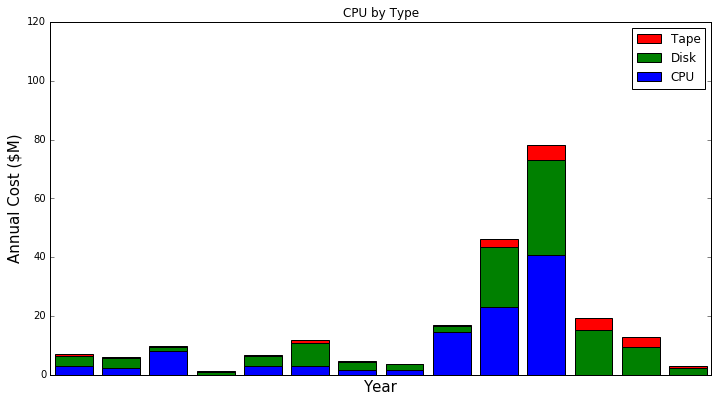

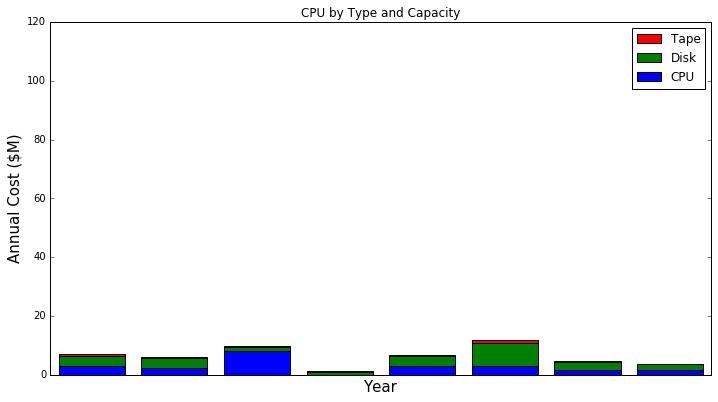

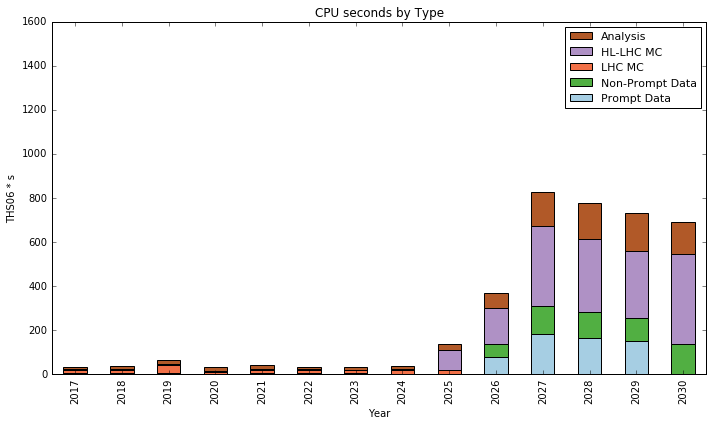

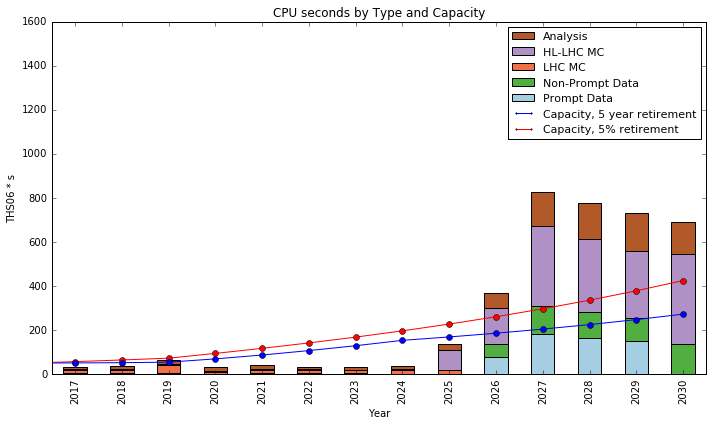

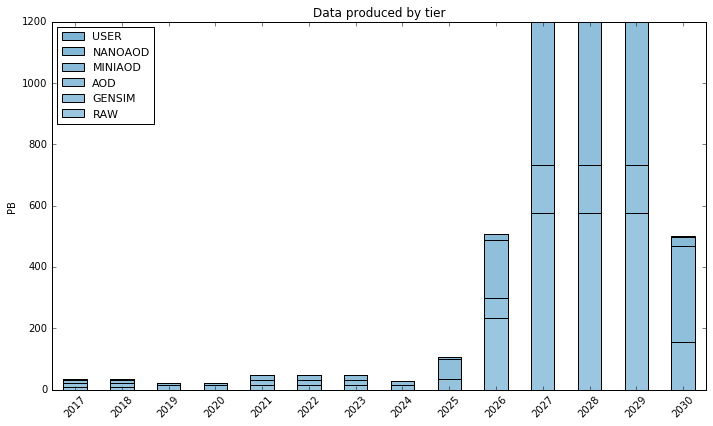

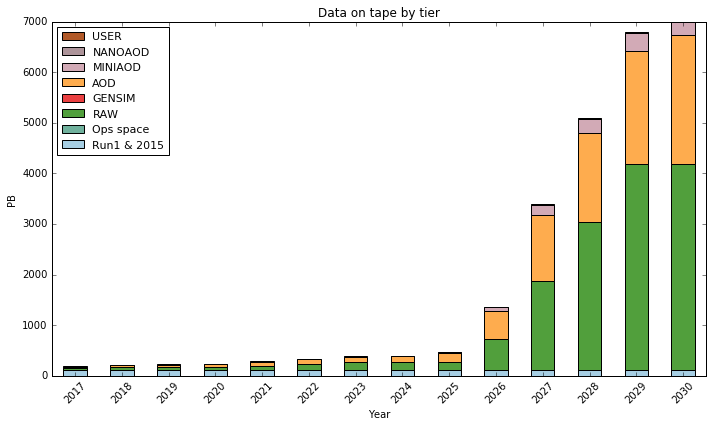

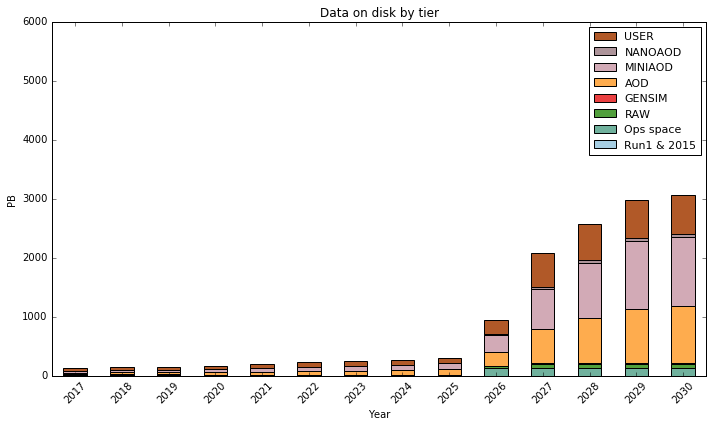

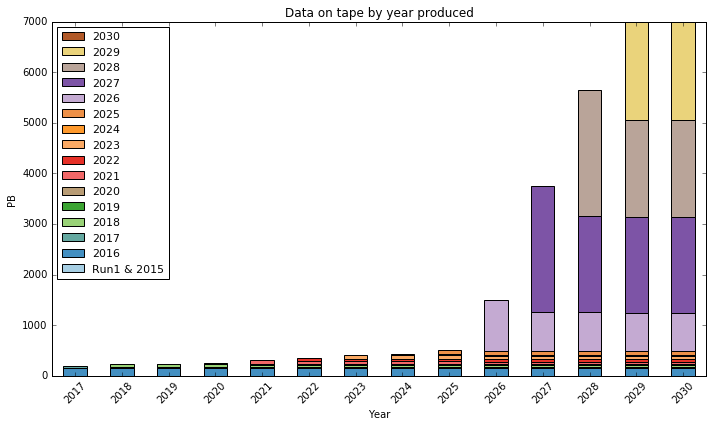

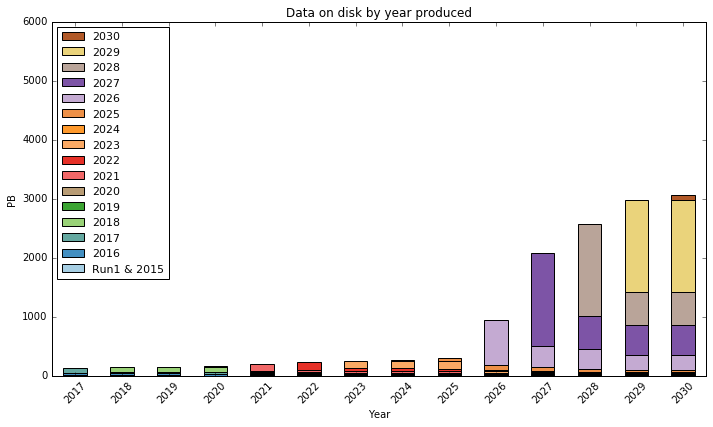

In [1]:
%run notebook_importer.ipynb
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = 10, 6

from resource_runner import run_computing_model
import resource_cpu
import CostEvolution

jsons=['json/RelyOnMiniAOD.json', 'json/Analysis.json', 'json/2018changes.json', 'json/IntroduceNanoAOD.json'] 
model=resource_cpu.create_model(jsons )
model['names']=jsons
cost_models=CostEvolution.define_cost_model()
model['cost_model']=cost_models

default_reco_hs06 = model['cpu_time']['data']['RECO']["2026"]
default_reco_hs06_mc = model['cpu_time']['mc']['RECO']["2026"]
#print default_reco_hs06,default_reco_hs06_mc
import numpy
vals = numpy.arange(1.0,0.0,-0.1)
costs=numpy.zeros(vals.shape[0])
for i,v in enumerate(vals):
    model['cpu_time']['data']['RECO']["2026"] = default_reco_hs06 * v
    model['cpu_time']['mc']['RECO']["2026"] = default_reco_hs06_mc * v
    metrics,details=run_computing_model(model)
    print v,metrics
    costs[i]=metrics['cost']
    
costs=1.0-costs/costs[0]
for i in range(len(vals)):
    print '%3.1f %4.2f' %(vals[i],costs[i])
    